### **1. IMPORTING LIBRARIES AND DATASET**

**1.1 Install Catboost Package**

In [1]:
!pip install catboost

**1.2 Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
import pickle

**1.3. Loading Dataset**

In [3]:
ins = pd.read_csv("/content/insurance.csv")

**1.4 First 5 Records**

In [4]:
ins.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


**1.5 Shape of the Dataset**

In [5]:
ins.shape

(1338, 7)

### **2. DATA CHECKS**

**2.1 Check for Missing Values**

In [6]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

**2.2 Check for Duplicate Values**

In [7]:
ins.duplicated().sum()

1

In [8]:
ins.drop_duplicates(inplace=True)

**2.3 Data Information**

In [9]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


**2.4 Description of the Dataset**

In [10]:
ins.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


### **3. DATA ANALYSIS**

**3.1 Correlation Matrix**

<ipython-input-11-ffffd1c5cefb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl = ins.corr()


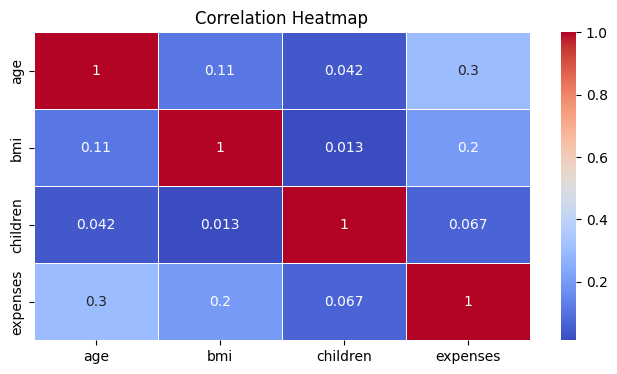

In [11]:
correl = ins.corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correl, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**3.2 Representation in Boxplot**

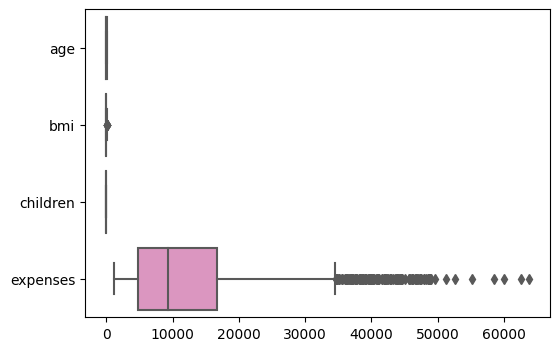

In [12]:
plt.figure(figsize=(6, 4))
ax = sns.boxplot(data = ins, color = "violet", palette = "Set2", orient = 'h')
plt.show()

**3.3 Counts of Sex**

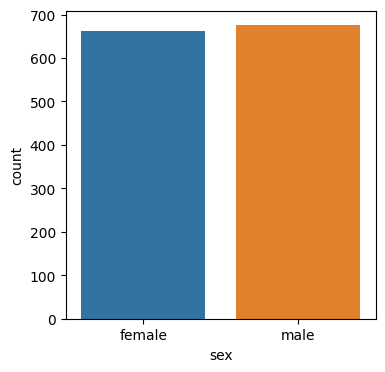

In [13]:
plt.figure(figsize=(4, 4))
sns.countplot(x=ins['sex'],data=ins)
plt.show()

**3.4 Counts of Smoker**

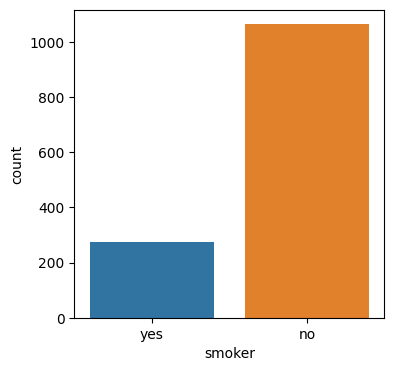

In [14]:
plt.figure(figsize=(4, 4))
sns.countplot(x=ins['smoker'],data=ins)
plt.show()

**3.5 Counts of Region**

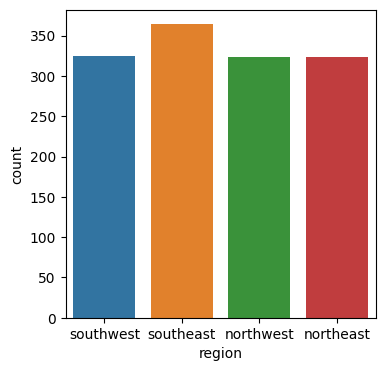

In [15]:
plt.figure(figsize=(4, 4))
sns.countplot(x=ins['region'],data=ins)
plt.show()

**3.6 Kde Plot of Expenses**

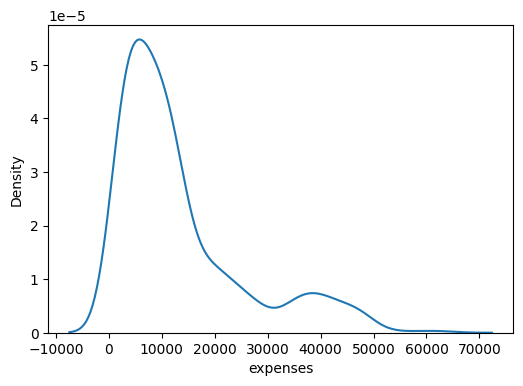

In [16]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=ins,x=ins.expenses)
plt.show()

**3.7 Relation between smoker and sex**

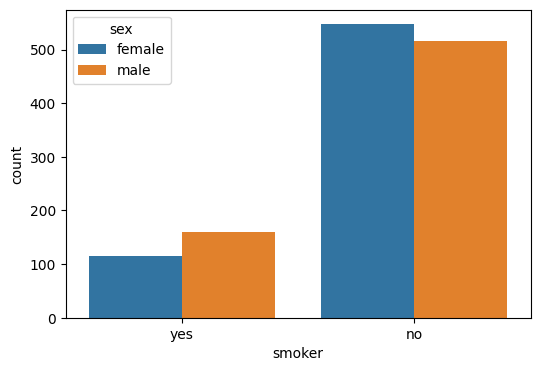

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(data=ins, x='smoker', hue='sex')
plt.show()

**3.8 Relation between region and sex**

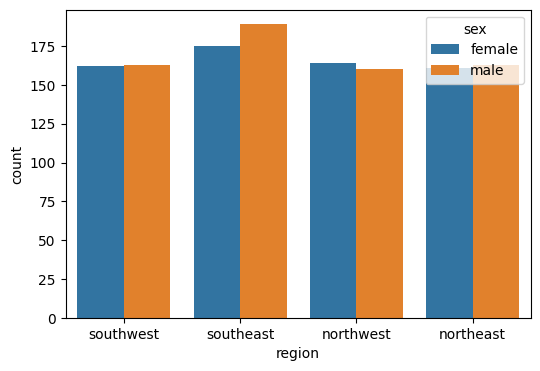

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=ins, x='region', hue='sex')
plt.show()

**3.9 Relation between region and children**

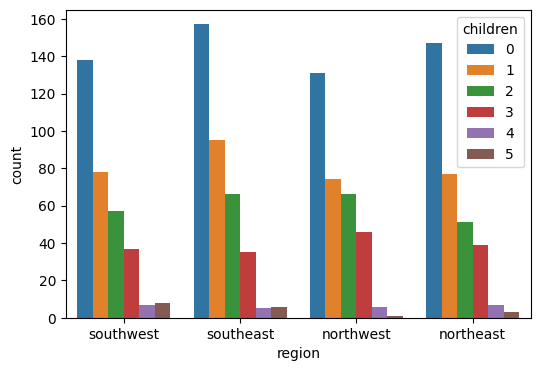

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data=ins, x='region', hue='children')
plt.show()

**3.10 Relation between bmi and expenses**

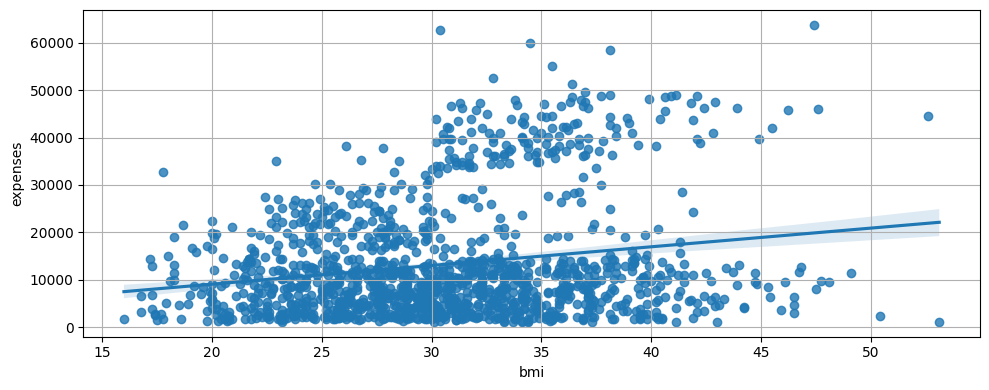

In [20]:
plt.figure(figsize=(10,4))
sns.regplot(x=ins['bmi'],y=ins['expenses'])
plt.tight_layout()
plt.grid(True)
plt.show()

### **4. DATA PREPROCESSING**

**4.1 Label Encoding**

In [21]:
le = LabelEncoder()

ins["sex"] = le.fit_transform(ins["sex"])
ins["smoker"] = le.fit_transform(ins["smoker"])
ins["region"] = le.fit_transform(ins["region"])

### **5. SEPARATING TARGET VALUES**

In [22]:
X = ins.drop(["expenses"],axis=1)
Y = ins["expenses"]

### **6. MODEL TRAINING AND PERFORMANCE METRICES**

In [23]:
models = [
    ("Gradient Boosting Regressor", GradientBoostingRegressor()),
    ("Random Forest Regressor", RandomForestRegressor()),
    ("XGBoost Regressor", XGBRegressor()),
    ("AdaBoost Regressor", AdaBoostRegressor()),
    ("Linear Regression", LinearRegression()),
    ("Lasso", Lasso()),
    ("Ridge", Ridge()),
    ("CatBoost Regressor", CatBoostRegressor(silent=True)),
]


for name, model in models:
    print(f"Model: {name}")

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    r2 = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)

    cv_scores = cross_val_score(model, X, Y, cv=5, scoring='r2')

    print(f"R-squared Score :- {r2:.2f}")
    print(f"Mean Squared Error :- {mse:.2f}")
    print(f"Cross-Validation R-squared Scores :- {cv_scores}")
    print(f"Mean CV R-squared :- {cv_scores.mean():.2f}")
    print("----------------------------------------")

Model: Gradient Boosting Regressor
R-squared Score :- 0.86
Mean Squared Error :- 18644325.55
Cross-Validation R-squared Scores :- [0.87494297 0.79997462 0.89259278 0.84930822 0.86034657]
Mean CV R-squared :- 0.86
----------------------------------------
Model: Random Forest Regressor
R-squared Score :- 0.83
Mean Squared Error :- 22431753.81
Cross-Validation R-squared Scores :- [0.85275391 0.77332322 0.86363535 0.82764546 0.8527686 ]
Mean CV R-squared :- 0.83
----------------------------------------
Model: XGBoost Regressor
R-squared Score :- 0.78
Mean Squared Error :- 28170415.56
Cross-Validation R-squared Scores :- [0.81894273 0.72820517 0.83729932 0.82094186 0.83397351]
Mean CV R-squared :- 0.81
----------------------------------------
Model: AdaBoost Regressor
R-squared Score :- 0.83
Mean Squared Error :- 21940859.42
Cross-Validation R-squared Scores :- [0.84164889 0.77615792 0.83334331 0.80652451 0.83889232]
Mean CV R-squared :- 0.82
----------------------------------------
Model: 

### **7. PICKLE**

In [24]:
with open("gradient_boosting_model.pkl", "wb") as model_file:
    pickle.dump(models[0][1], model_file)

### **8. USER INPUT**

In [25]:
user_input = {
    "age": float(input("Enter age:- ")),
    "sex": input("Enter sex (male[1] or female[0]):- "),
    "bmi": float(input("Enter BMI:- ")),
    "children": int(input("Enter number of children:- ")),
    "smoker": input("Smoker (yes[0] or no[1]):- "),
    "region": input("Enter region (Southeast[0], Southeast[1], Northwest[2], Northeast[3]) :- ")
}

user_data = pd.DataFrame(user_input, index=[0])
prediction = model.predict(user_data)

print("Predicted Expenses:- Rs. ", prediction[0])

Enter age:- 32
Enter sex (male[1] or female[0]):- 0
Enter BMI:- 34.5
Enter number of children:- 2
Smoker (yes[0] or no[1]):- 1
Enter region (Southeast[0], Southeast[1], Northwest[2], Northeast[3]) :- 2
Predicted Expenses:- Rs.  40563.9437935741
